<a href="https://colab.research.google.com/github/Jay-Wolff/Polynomial-Regression/blob/main/Learning_Process_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Learning Process

 **polynomial regression** model on the temperature data. (data set from class)

In [ ]:
import torch

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

a. Define a `model(t_u, w1, w2, b)` function using the following expression:

`prediction = w2 * t_u ** 2 + w1 * t_u + b`.

This expression claims that the relationship between the Celsuis degree and the unknown degree is a polynomial of degree 2.

In [ ]:
def model(t_u,w1,w2,b):
  return w2 * t_u ** 2 + w1 * t_u + b

The loss function remains the same. The MSE loss can still be used to measure the errors made by the polynomial model.

In [ ]:
def loss_fn(t_p, t_c):
    squared_errors = (t_p - t_c) ** 2
    return squared_errors.mean()

b. Create a SGD optimizer object using `torch.optim.SGD`.

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
learning_rate = 1e-5
optimizer = torch.optim.SGD([params], lr=learning_rate)

c. Define a function `training_loop(n_eochs, learning_rate, params, t_u, t_c)` to perform gradient descent on the training data.

In [ ]:
#to visualize the model:
import matplotlib.pyplot as plt

def training_loop(n_epochs, optimizer, learning_rate, params, t_u, t_c):
    losses = []
    for epoch in range(1, n_epochs + 1):
      t_p = model(t_u, *params)
      loss = loss_fn(t_p, t_c)
      losses.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if epoch % 100 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))

    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

d. Perform the training loop with 2000 epochs. Display the final MSE loss. (You may also want to visualize the model using `matplotlib`).

Epoch 100, Loss nan
Epoch 200, Loss nan
Epoch 300, Loss nan
Epoch 400, Loss nan
Epoch 500, Loss nan
Epoch 600, Loss nan
Epoch 700, Loss nan
Epoch 800, Loss nan
Epoch 900, Loss nan
Epoch 1000, Loss nan
Epoch 1100, Loss nan
Epoch 1200, Loss nan
Epoch 1300, Loss nan
Epoch 1400, Loss nan
Epoch 1500, Loss nan
Epoch 1600, Loss nan
Epoch 1700, Loss nan
Epoch 1800, Loss nan
Epoch 1900, Loss nan
Epoch 2000, Loss nan


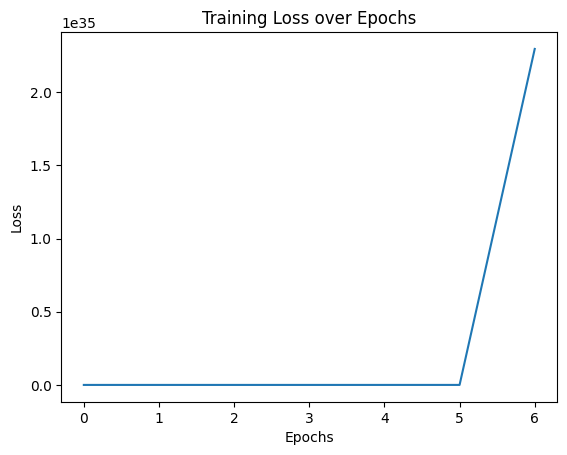

In [ ]:

# Modify the training process to actually reduce the loss.
training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    learning_rate = 1e-5,
    # params = torch.tensor([1.0, 0.0]),
    params = params,
    t_u = t_u,
    t_c = t_c)